## Практична робота № 5 Графи. Ациклічні графи.
## Мета: набути практичних навичок розв’язання задач топографічного сортування та оцінювання їх асимптотичної складності.
### Виконав: Яцентюк Євгеній, група: КІ-24-1 

##### Мій Варіант 13 (23) = 23-10=13

**(13) Завдання:**
Задано ациклічний граф: $\{1,2,3,4,5,6,7,8,9\}\{(1,2),(1,3),(2,4),(3,5),(4,5),(4,6),(6,7),(7,8),(8,9)\}$.
Побудувати граф і розв'язати задачу топологічного сортування за допомогою алгоритму Кана.

**[GitHub](https://github.com/kefir4ikk)**

## Імпорт

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

## 1. Реалізація Алгоритму Кана

In [37]:
def kahn_topological_sort(vertices, edges):
    graph = defaultdict(list)
    in_degree = {v: 0 for v in vertices}
    
    for u, v in edges:
        graph[u].append(v)
        in_degree[v] += 1
        
    queue = [v for v in vertices if in_degree[v] == 0]
    
    topological_order = []
    
    while queue:
        u = queue.pop(0)
        topological_order.append(u)
        
        if u in graph:
            for v in graph[u]:
                in_degree[v] -= 1 # "Видаляємо" ребро
                if in_degree[v] == 0:
                    queue.append(v)
                    
    if len(topological_order) != len(vertices):
        return
        
    return topological_order

## 2. Введення даних Варіанта 13

In [22]:
vertices = [1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [
    (1, 2), (1, 3), 
    (2, 4), 
    (3, 5), 
    (4, 5), (4, 6), 
    (6, 7), 
    (7, 8), 
    (8, 9)
]

print(f"Вершини: {vertices}")
print(f"Ребра: {edges}")

Вершини: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Ребра: [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5), (4, 6), (6, 7), (7, 8), (8, 9)]


## 3. Запуск алгоритму та виведення результату

In [23]:
result = kahn_topological_sort(vertices, edges)

print("-" * 30)
print(f"Результат топологічного сортування (Алгоритм Кана):")
print(result)
print("-" * 30)

------------------------------
Результат топологічного сортування (Алгоритм Кана):
[1, 2, 3, 4, 5, 6, 7, 8, 9]
------------------------------


## 4. Візуалізація графа

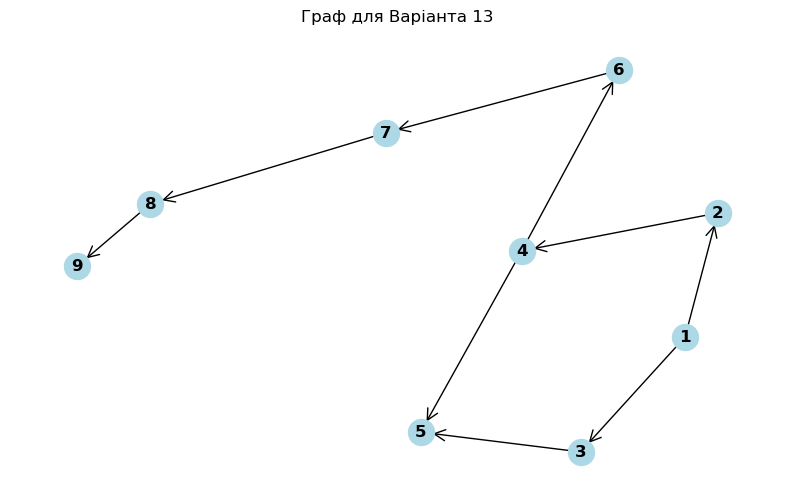

In [35]:
G = nx.DiGraph()
G.add_nodes_from(vertices)
G.add_edges_from(edges)

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=4)  
nx.draw_networkx_nodes(G, pos, node_size=350, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("Граф для Варіанта 13")
plt.axis('off')
plt.show()

## Відповіді на контрольні питання 

**1. Які переваги і недоліки алгоритму Кана порівняно з алгоритмом DFS для топологічного сортування графа?**

* **Алгоритм Кана (ітеративний):**
    * *Переваги:* Легко виявляє цикли (якщо в кінці алгоритму залишилися невідсортовані вершини — є цикл). Дозволяє паралельну обробку вершин, які одночасно потрапили в чергу (не мають залежностей). Не викликає переповнення стека.
    * *Недоліки:* Потребує додаткової пам'яті для зберігання масиву вхідних степенів вершин (`in_degree`) та черги.
* **Алгоритм DFS (рекурсивний):**
    * *Переваги:* Простіша реалізація (менше коду). Ефективний для розріджених графів.
    * *Недоліки:* Ризик переповнення стека викликів на дуже глибоких графах. Складніша логіка виявлення циклів (потрібне розфарбовування вершин).

**2. Яка складність часу і пам’яті для кожного з алгоритмів у найгіршому і найкращому випадках?**

* **Часова складність:** Для обох алгоритмів (Кана та DFS) вона однакова — **$O(|V| + |E|)$**, де $|V|$ — кількість вершин, а $|E|$ — кількість ребер. Це пояснюється тим, що в обох випадках необхідно обійти всі вершини та всі ребра.
* **Просторова складність:** **$O(|V|)$**.
    * У Кана це пам'ять під масив степенів та чергу.
    * У DFS це пам'ять під стек рекурсії та масив відвіданих вершин.

**3. Чи можна застосовувати алгоритм Кана до графів з вагами на ребрах? Як це порівняти з DFS?**

Так, алгоритм Кана (як і DFS) можна застосовувати до зважених графів.
* Вага ребра ніяк не впливає на порядок топологічного сортування, оскільки воно залежить виключно від **напрямку** зв'язків (залежностей).
* В обох алгоритмах ваги просто ігноруються, тому різниці в роботі з вагами між ними немає.

**4. Як впливає структура графа на швидкість роботи кожного з цих алгоритмів?**

* **Густі графи (багато ребер):** Алгоритм Кана зазвичай працює стабільніше та ефективніше, оскільки він обробляє вершини групами.
* **Розріджені графи (мало ребер):** DFS може мати незначну перевагу через менші накладні витрати на підтримку структур даних.
* **Лінійні графи (довгі ланцюжки):** На дуже довгих ланцюжках DFS може впасти з помилкою `StackOverflow`, тоді як Кана працюватиме коректно.

**5. Чи є обмеження використання кожного алгоритму для певних типів графів або завдань?**

Головне спільне обмеження: граф **обов'язково має бути ациклічним (DAG)**.
* Якщо граф містить цикл, топологічне сортування неможливе математично.
* Алгоритм Кана одразу поверне помилку (або неповний результат).
* Алгоритм DFS зациклиться або потребуватиме додаткової перевірки на зворотні ребра.

**6. Які варіанти оптимізації можна застосувати для кожного алгоритму з метою поліпшення його продуктивності?**

* **Для алгоритму Кана:** Використання швидких черг (наприклад, `collections.deque` у Python) замість звичайних списків для операцій за $O(1)$. Можлива багатопотокова обробка незалежних вершин з черги.
* **Для алгоритму DFS:** Заміна рекурсії на власний стек (ітеративний підхід) для уникнення переповнення пам'яті. Використання бітових масивів (bitsets) для зберігання стану відвіданих вершин, щоб економити пам'ять.